In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools 

import time

import networkx as nx
from networkx.algorithms import approximation as apx

# import landscape as ld
import steiner_utils as su

In [3]:
def get_pos(g):
    '''returns dictionary with nodes physical location'''
    return dict( (n, n) for n in g.nodes() )

# Compute timing
Points selected at random. 

In [4]:
L0 = 10; Nterm = 10
terminals_2 = su.make_random_terminals(box_size = L0, Nterminals = Nterm)
G_2 = su.create_graph(box_size = L0, terminals = terminals_2)
su.graph_info(G_2, verbosity = False)

(1, 81, 144, 9)

In [5]:
tic = time.time()
steiner_2 = su.naive_steiner(G_2)

toc = time.time()
print('Calculation took {} sec'.format(toc-tic))
print('Length of Steiner tree {}'.format(len(steiner_2)))  

Calculation took 0.025907039642333984 sec
Length of Steiner tree 22


In [6]:
def time_steiner(L0, Nterm):
    terminals = su.make_random_terminals(box_size = L0, Nterminals = Nterm)
    G = su.create_graph(box_size = L0, terminals = terminals)
    
    info = su.graph_info(G, verbosity = False)
    
    tic = time.time()
    steiner = su.naive_steiner(G)

    toc = time.time()
    
    return (info, (toc-tic))

## Vary L0

In [7]:
varyL0 = [time_steiner(L0, 20) for L0 in range(10,41,2)]

In [8]:
varyL0

[((1, 81, 144, 17), 0.09529376029968262),
 ((1, 121, 220, 17), 0.05496549606323242),
 ((1, 169, 312, 20), 0.1079874038696289),
 ((1, 225, 420, 20), 0.24718213081359863),
 ((1, 289, 544, 17), 0.38416028022766113),
 ((1, 361, 684, 20), 0.5747056007385254),
 ((1, 441, 840, 20), 0.9326508045196533),
 ((1, 529, 1012, 20), 1.5170516967773438),
 ((1, 625, 1200, 19), 2.1329920291900635),
 ((1, 729, 1404, 20), 2.929325580596924),
 ((1, 841, 1624, 19), 4.043236494064331),
 ((1, 961, 1860, 20), 5.6062304973602295),
 ((1, 1089, 2112, 20), 6.664734601974487),
 ((1, 1225, 2380, 20), 9.290717840194702),
 ((1, 1369, 2664, 20), 11.308866739273071),
 ((1, 1521, 2964, 19), 14.460053205490112)]

In [9]:
X, Y = [x[-2] for x,y in varyL0], [y for x,y in varyL0]

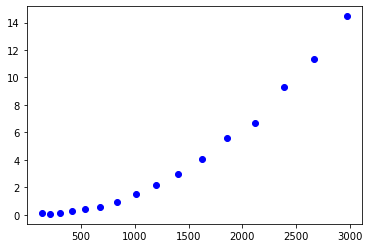

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line = ax.plot(X, Y, 'o', color='blue')

## vary Nterm

In [11]:
varyNterm = [time_steiner(30, Nterm) for Nterm in range(10,61,4)]

In [12]:
time_steiner(30, 20)

((1, 841, 1624, 20), 4.10342001914978)

In [13]:
varyNterm[0]

((1, 841, 1624, 10), 4.017768621444702)

In [14]:
X, Y = [x for x,y in varyNterm], [y for x,y in varyNterm]

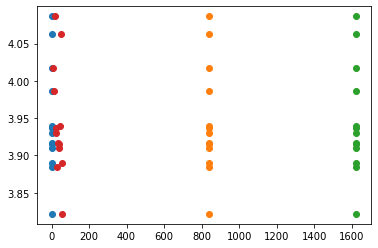

In [15]:
plt.plot(X,Y,'o')

# Shortest path

In [16]:
L0 = 40; Nterm = 2
terminals_3 = su.make_random_terminals(box_size = L0, Nterminals = Nterm)
G_3 = su.create_graph(box_size = L0, terminals = terminals_3)
su.graph_info(G_3, verbosity = False)

(1, 1521, 2964, 2)

In [17]:
def time_shortest_path(L0):
    
    terminals = su.make_random_terminals(box_size = L0, Nterminals = 2)
    G = su.create_graph(box_size = L0, terminals = terminals)
    info = su.graph_info(G, verbosity = False)
    
    s, t = terminals
    
    tic = time.time()
    nx.algorithms.shortest_path(G, source = s, target = t)
    toc = time.time()
    
    return (info, (toc-tic))

In [18]:
allY = []
for i in range(30):
    TimingsShortestPath = [time_shortest_path(L0) for L0 in range(10,61,2)]
    X = [x[2] for x,y in TimingsShortestPath]
    Y = np.array([y for x,y in TimingsShortestPath])
    allY.append(Y)

In [19]:
meanY = np.mean(allY, axis= 0)

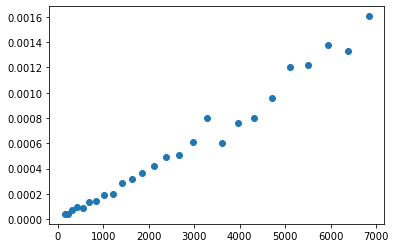

In [20]:
plt.plot(X,meanY,'o');

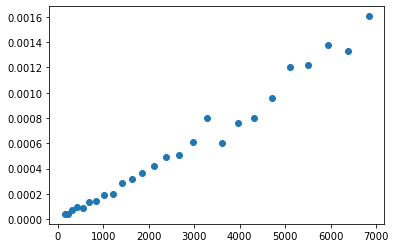

In [21]:
plt.plot(X,meanY,'o');